## EDA AND DECISION TREE ##

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### **1.Load Data:  bank-full.csv**

In [7]:
df = pd.read_csv('E:/DSM 1/DATA SET/bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df.shape

(45211, 17)

#### **Create a variable Conversion**

In [12]:
df['conversion'] = df['Target'].apply(lambda x: 1 if x == 'yes' else 0)

### **2. Conduct EDA on all variables**

#### **Calculate conversion rate by education and display the result as bar chart**

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  Target      45211 non-null  object
 17  conversion  45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [17]:
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [13]:
conversion_rate_by_education = pd.DataFrame(df.groupby('education')['conversion'].mean().reset_index())

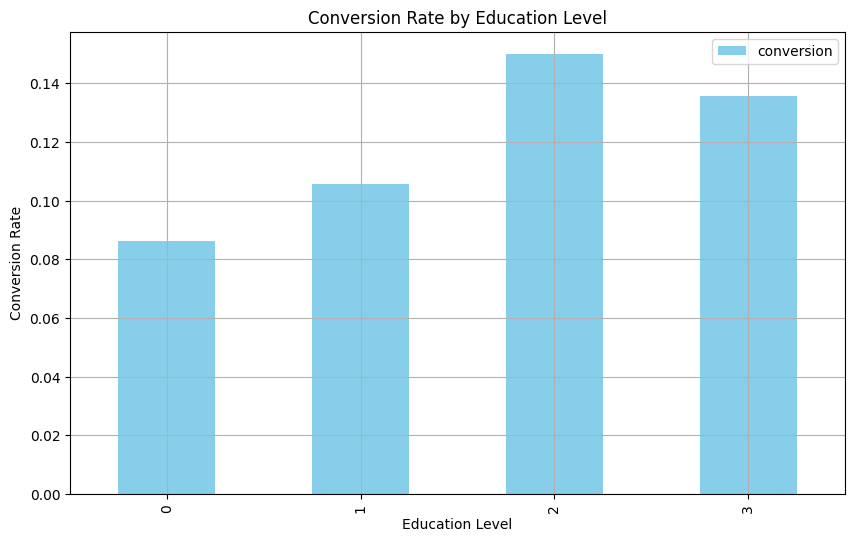

In [14]:
ax = conversion_rate_by_education.plot(
    kind= 'bar',
    color='skyblue',
    grid=True,
    figsize=(10, 6),
    title='Conversion Rate by Education Level')

ax.set_xlabel('Education Level')
ax.set_ylabel('Conversion Rate')

plt.show()

### **3. Encoding Categorical Variables (education and default)**

In [19]:
Encoded_df=pd.get_dummies(df,columns=['education','default'])
Encoded_df.head()

,age,job,marital,balance,housing,loan,contact,day,month,duration,...,previous,poutcome,Target,conversion,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes
0,58,management,married,2143,yes,no,unknown,5,may,261,...,0,unknown,no,0,False,False,True,False,True,False
1,44,technician,single,29,yes,no,unknown,5,may,151,...,0,unknown,no,0,False,True,False,False,True,False
2,33,entrepreneur,married,2,yes,yes,unknown,5,may,76,...,0,unknown,no,0,False,True,False,False,True,False
3,47,blue-collar,married,1506,yes,no,unknown,5,may,92,...,0,unknown,no,0,False,False,False,True,True,False
4,33,unknown,single,1,no,no,unknown,5,may,198,...,0,unknown,no,0,False,False,False,True,True,False


In [24]:
Encoded_df['default'] = pd.get_dummies(df['default'], drop_first=True)
Encoded_df['housing'] = pd.get_dummies(df['housing'], drop_first=True)

### **4. Build a classification model**

#### **Choose the encoded variables with two numerical variables (balance and Duration)**

In [26]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [27]:
features = Encoded_df[
    ['balance', 'duration'] +
    [col for col in Encoded_df.columns if col.startswith('education_') or col.startswith('default_')]
]

response = Encoded_df['conversion']

#### **Build Decision Tree model**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    response,
    test_size=0.3,
    random_state=42
)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X_train, y_train)

In [29]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

#### **Display Tree with max depth of 3**

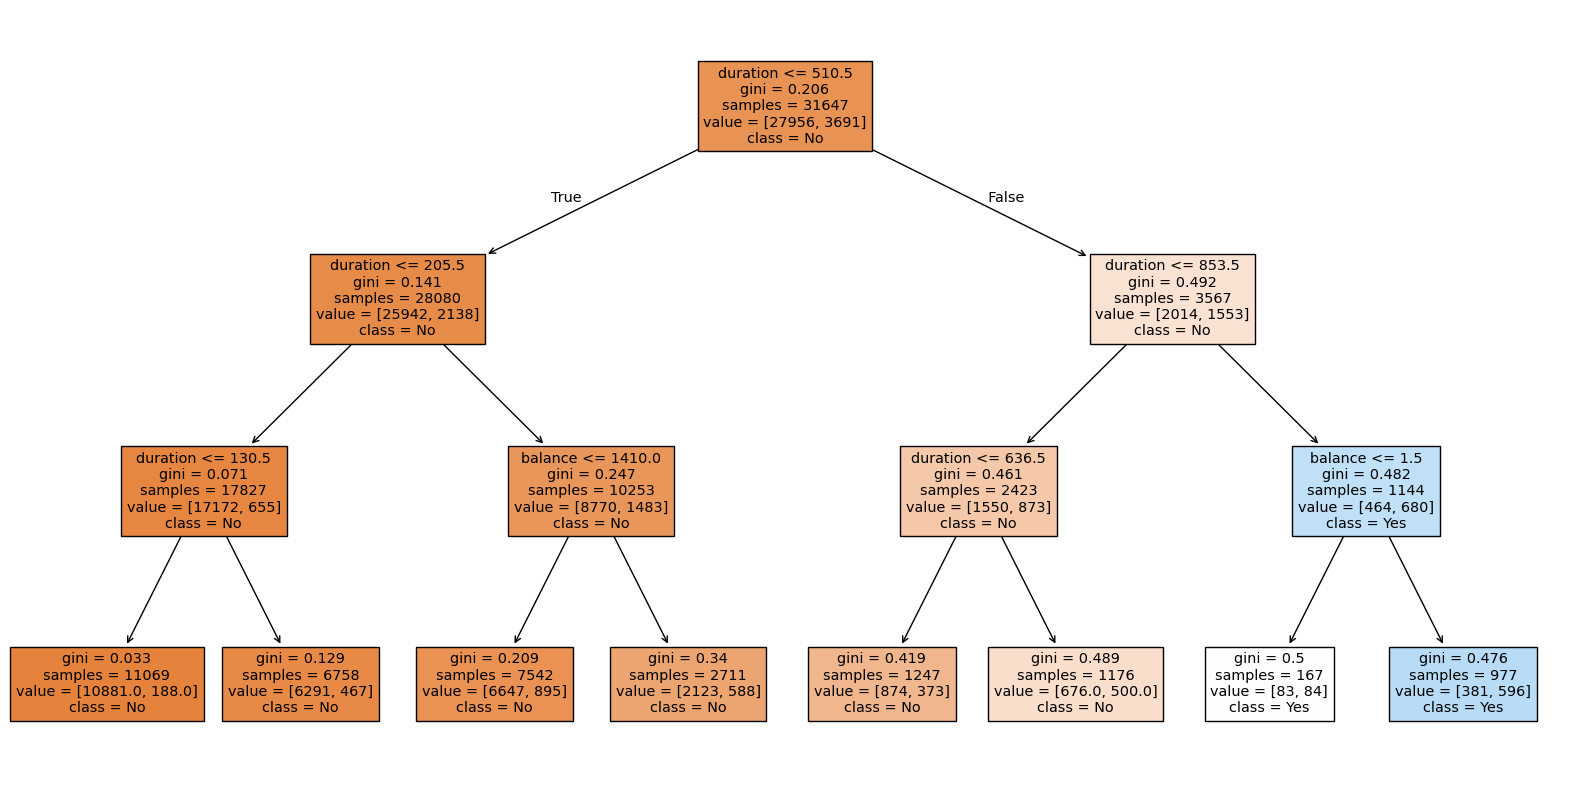

In [30]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,
    feature_names=features.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()

### **Summarize insights**

• Conversion rate varies significantly across education levels  
• Customers with higher education show better subscription likelihood  
• Balance and call duration are strong predictors of conversion  
• Decision Tree provides clear, interpretable rules for marketing decisions  
• Model helps banks target high-probability customers efficiently
